# Import Libs

In [337]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Creating a Barabasi Network 

In [338]:
num_of_nodes = 10000 #@param{type:"number"}
m = 1 #@param{type:"number"}
G = nx.barabasi_albert_graph(num_of_nodes, m, seed=None)

#Func 

In [339]:
def degree_histogram_plot_x_and_y(g, normalized=True):
    aux_y = nx.degree_histogram(g)    
    aux_x = np.arange(0,len(aux_y)).tolist()
    aux_y = [x / num_of_nodes for x in aux_y]
    return aux_x[1:], aux_y[1:]

In [340]:
hist_Gx, hist_Gy = degree_histogram_plot_x_and_y(G)

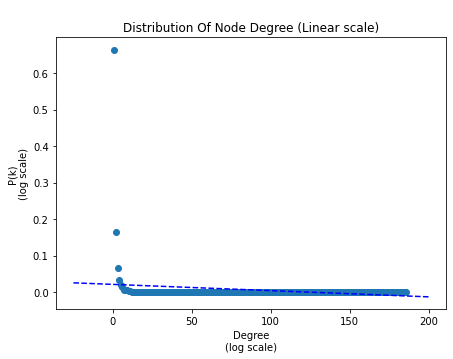

In [341]:
plt.figure(figsize=(7,5))
plt.plot(hist_Gx, hist_Gy,'o')
plt.title('\nDistribution Of Node Degree (Linear scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('P(k)\n(log scale)')

slope, yint = np.polyfit(hist_Gx,hist_Gy,1)
xline = plt.xticks()[0]
yline = list(map(lambda x: slope*x+yint,xline))
plt.plot(xline,yline,ls='--',color='b')

plt.show()

#Explanation

The only mathematical form that is a straight line on a log-log-plot is an exponential function. https://en.wikipedia.org/wiki/Log%E2%80%93log_plot

Since you have data with x=0 in it you can't just fit a line to log(y) = k*log(x) + a because log(0) is undefined. So we'll have to use a fitting function that is an exponential; not a polynomial. To do this we use scipy.optimize and it's curve_fit function. We do an exponential and another sightly more complicated function to illustrate how to use this function:

https://stackoverflow.com/questions/32536226/log-log-plot-linear-regression

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 0.6652313528564592
	b = popt[1] = -2.071468105550817
Modified Exponential Fit: y = (a*(x**b)) + c
	a = popt[0] = -631.592247257204
	b = popt[1] = 3.6497726835149325e-05
	c = popt[2] = 631.6954809363868


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


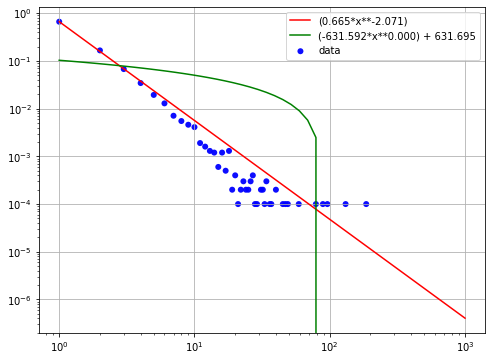

In [344]:
def expFuncAprox(x, a, b):
    return a * np.power(x, b)

def complexFuncAprox(x, a, b, c):
    return a * np.power(x, b) + c

x=np.array(hist_Gx)
y=np.array(hist_Gy)
fig = plt.figure(figsize=(8, 6))
ax=plt.gca() 
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none', label='data')
ax.set_yscale('log')
ax.set_xscale('log')

newX = np.logspace(0, 3, base=10) 

popt, pcov = curve_fit(expFuncAprox, x, y)
plt.plot(newX, expFuncAprox(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
print ("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

popt, pcov = curve_fit(complexFuncAprox, x, y, maxfev=10000)
plt.plot(newX, complexFuncAprox(newX, *popt), 'g-', label="({0:.3f}*x**{1:.3f}) + {2:.3f}".format(*popt))
print ("Modified Exponential Fit: y = (a*(x**b)) + c")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}\n\tc = popt[2] = {2}".format(*popt))

ax.grid(b='on')
plt.legend(loc='upper right')
plt.show()